## Introduction: 
Team Dirt decided to evaluate Pittsburgh neighborhoods based on environmental cleanliness. This means minimal trash and pollution and maximal utilization of resources to maintain a healthy living area. This metric was formulated by sourcing environmental related data available on the Western PA Regional Data Center website. Other data sets such as number of gardens and green infrastructure projects were explored, but ultimately the data sets used in this notebook were chosen for the availability of neighborhood information. To determine the best neighborhood, individual submetric scores are averaged together to contribute to a final total score.

## The Metric: 

The metrics used to evaluate Pittsburgh neighborhoods are [air quality](https://data.wprdc.org/dataset/allegheny-county-air-quality/resource/36fb4629-8003-4acc-a1ca-3302778a530d), [amount of smart trash cans](https://data.wprdc.org/datastore/dump/75b83ac9-8069-4cf1-bcc3-b9e6b04487d9), and [number of local bridges](https://data.wprdc.org/datastore/dump/23f675e5-f745-49c1-8fa0-c5bc35c25184). Neighborhoods with with a low pollution, many smart trash cans, and many bridges were ranked highly. The neighborhoods that qualify can be found [here](https://data.wprdc.org/dataset/neighborhoods2).


## The Best Neighborhood:
The following shows the ranking of the neighborhoods for each submetric.

### Air Quality Scores

In [63]:
import pandas as pd
import matplotlib.pyplot as plot

data = pd.read_csv("ppm_ppb.csv", index_col="_id")

neighbor_qual = {}

def average(neighbor, data):
    # avg = df[df['site'] == 'name']['report_value'].mean()
    
    avg_qual = data[data['site'] == neighbor]['report_value'].mean()
    return avg_qual

def load_neighbors(df, neighbor_qual):
    neighbors = df['site'].unique()
    
    for hood in neighbors:
        # add to dict
        neighbor_qual[hood] = average(hood, df)

load_neighbors(data, neighbor_qual)
min_val = data['report_value'].min()
max_val = data['report_value'].max()
mid_val = (max_val-min_val)/2

vals = data['site'].value_counts()

plot.rcParams.update({'font.size': 100})

pd.Series(vals).plot(kind='barh', rot=0.5, edgecolor='black', figsize=(100, 300))

plot.xlabel('Air Quality (PPB)')  
plot.ylabel('Neighborhood')
plot.title('Air Quality Reports Per Pittsburgh Neighborhood')  

for i, val in enumerate(vals):
    plot.text(val, i, str(val), ha='left', va='center')

In [64]:
scores = 1 + (((vals.max() - vals) * (10 - 1)) / (vals.max() - vals.min()))
rank_df = pd.DataFrame({'site': scores.index, 'score': scores},  index=vals.index).sort_values(by='score', ascending=False)
rank_df

site      score
Court House              Court House  10.000000
North Braddock        North Braddock   9.837287
Flag Plaza                Flag Plaza   9.837287
Liberty                      Liberty   6.891689
South Fayette          South Fayette   6.891689
Avalon                        Avalon   6.890949
Parkway East            Parkway East   5.418890
Harrison Township  Harrison Township   3.693886
Lawrenceville          Lawrenceville   1.000000

### Smart Trash Can Scores

In [65]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

neighborhoods = pd.read_csv("pitt_neighborhoods.csv")
stc = pd.read_csv("smart-trash-cans.csv")

# count number of smart trash cans in neighborhoods in stc data set
counts = stc['neighborhood'].value_counts()

# zero if neighborhood doesn't exist in stc data set
for neighborhood in neighborhoods['hood']:
    if neighborhood not in counts:
        counts[neighborhood] = 0

plt.rcParams.update({'font.size': 100})

# create bar chart
pd.Series(counts).plot(kind='barh', rot=0.5, edgecolor='black', figsize=(100, 300))
plt.xlabel('Smart Trash Containers')  
plt.ylabel('Neighborhood')
plt.title('Smart Trash Containers Per Pittsburgh Neighborhood')  

# add count number at end of bars in bar chart
for i, count in enumerate(counts):
    plt.text(count, i, str(count), ha='left', va='center')

In [66]:
pd.set_option('display.max_rows', None)
scores = 0 + (((counts - counts.min()) * (10 - 0)) / (counts.max() - counts.min()))
scores_df = pd.DataFrame({'neighborhood': scores.index, 'score': scores},  index=counts.index)
scores_df

neighborhood      score
Shadyside                                  Shadyside  10.000000
East Liberty                            East Liberty   8.947368
Squirrel Hill South              Squirrel Hill South   8.289474
Bloomfield                                Bloomfield   7.631579
North Shore                              North Shore   6.973684
South Side Flats                    South Side Flats   6.710526
Strip District                        Strip District   5.526316
Carrick                                      Carrick   5.000000
Central Oakland                      Central Oakland   4.473684
Lower Lawrenceville              Lower Lawrenceville   3.815789
Middle Hill                              Middle Hill   3.815789
Central Lawrenceville          Central Lawrenceville   3.815789
Homewood South                        Homewood South   3.684211
Bluff                                          Bluff   3.684211
East Allegheny                        East Allegheny   3.421053
Mount Washington                    Mount Washington   3.289474
Brighton Heights                    Brighton Heights   3.157895
Squirrel Hill North              Squirrel Hill North   2.894737
Crawford-Roberts                    Crawford-Roberts   2.763158
Larimer                                      Larimer   2.631579
Hazelwood                                  Hazelwood   2.368421
Brookline                                  Brookline   2.236842
Marshall-Shadeland                Marshall-Shadeland   2.236842
Sheraden                                    Sheraden   2.105263
Troy Hill                                  Troy Hill   1.973684
Allegheny West                        Allegheny West   1.973684
Perry North                              Perry North   1.973684
Upper Lawrenceville              Upper Lawrenceville   1.973684
Greenfield                                Greenfield   1.842105
North Oakland                          North Oakland   1.842105
Polish Hill                              Polish Hill   1.710526
Point Breeze                            Point Breeze   1.578947
Perry South                              Perry South   1.578947
Elliott                                      Elliott   1.578947
Highland Park                          Highland Park   1.578947
Friendship                                Friendship   1.578947
Central Northside                  Central Northside   1.315789
Regent Square                          Regent Square   1.184211
West End                                    West End   1.184211
Allentown                                  Allentown   1.184211
Beechview                                  Beechview   1.052632
West Oakland                            West Oakland   1.052632
South Side Slopes                  South Side Slopes   1.052632
Crafton Heights                      Crafton Heights   1.052632
Morningside                              Morningside   1.052632
Upper Hill                                Upper Hill   0.921053
Central Business District  Central Business District   0.921053
Allegheny Center                    Allegheny Center   0.921053
Lincoln Place                          Lincoln Place   0.921053
Knoxville                                  Knoxville   0.921053
South Oakland                          South Oakland   0.921053
Garfield                                    Garfield   0.921053
Manchester                                Manchester   0.789474
Lincoln-Lemington-Belmar    Lincoln-Lemington-Belmar   0.789474
Chateau                                      Chateau   0.657895
Terrace Village                      Terrace Village   0.657895
Spring Hill-City View          Spring Hill-City View   0.657895
Westwood                                    Westwood   0.657895
Homewood North                        Homewood North   0.526316
California-Kirkbride            California-Kirkbride   0.526316
Fineview                                    Fineview   0.394737
Beltzhoover                              Beltzhoover   0.394737
Arlingto

### Bridge Scores

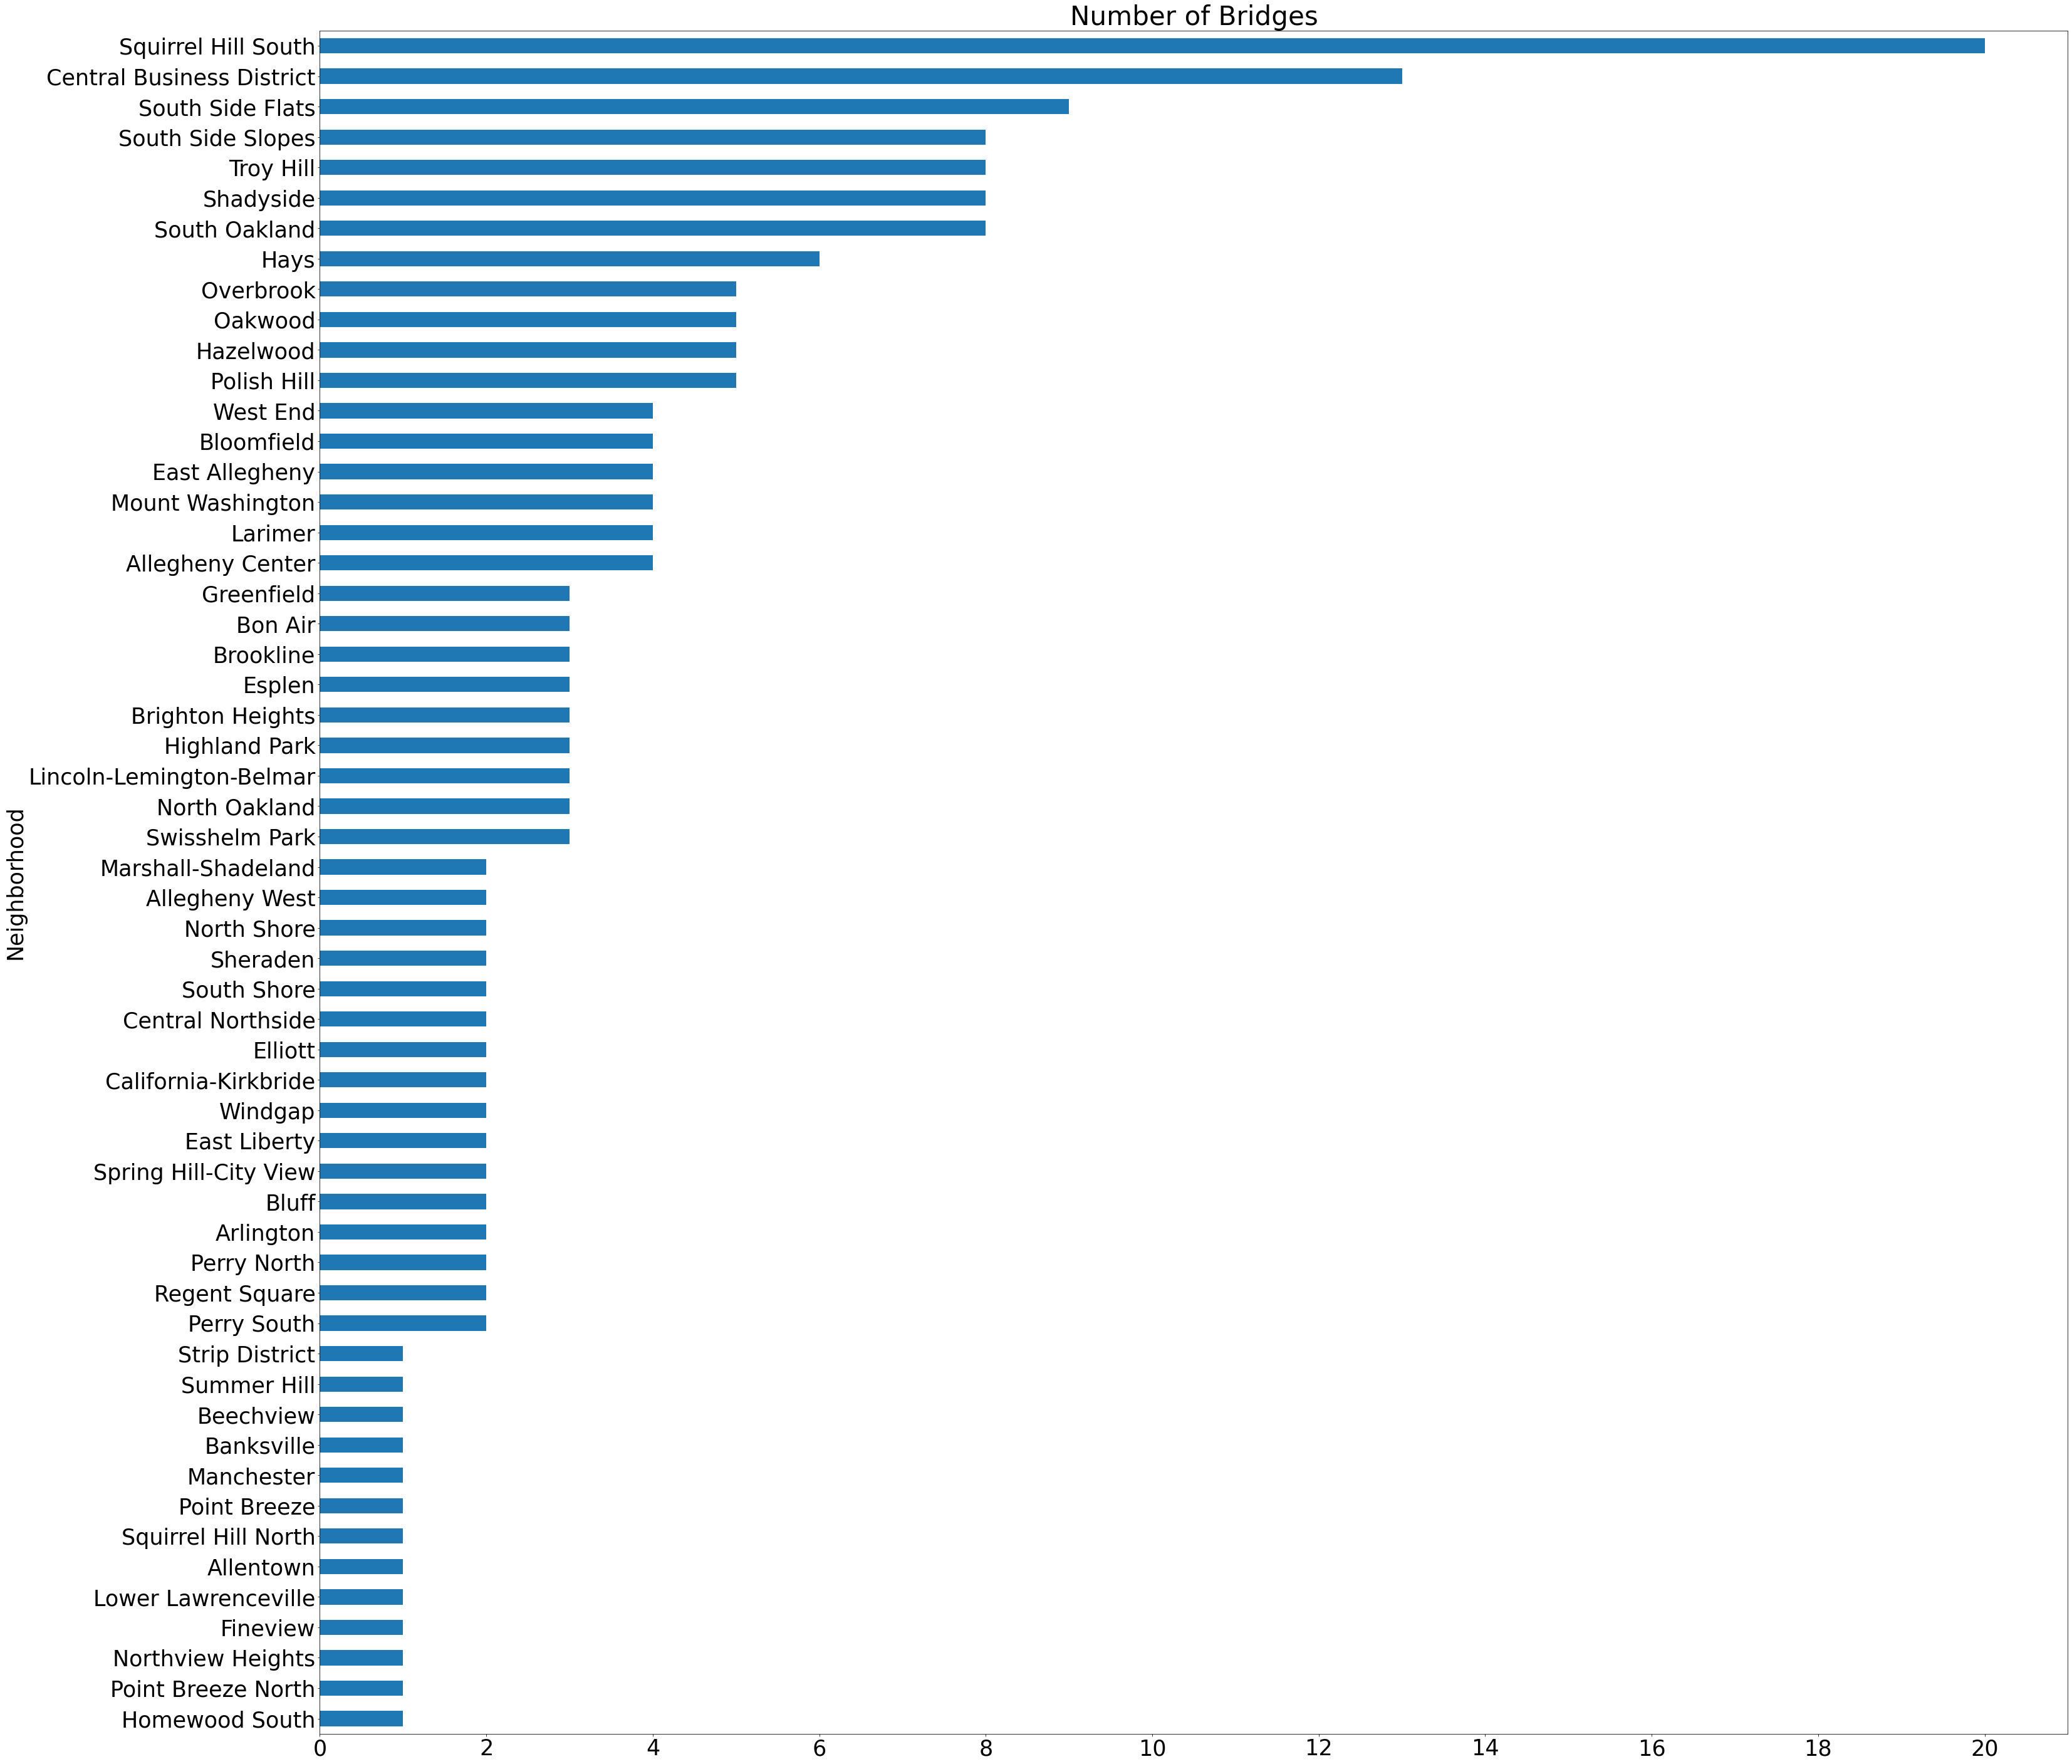

In [67]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

bridges = pd.read_csv("pitt_bridges.csv")

s = bridges['start_neighborhood']
count = dict()
for n in s:
    if n not in count:
        count[n] = 1
    else:
        count[n] = count[n] + 1
e = bridges['end_neighborhood']
for n in e:
    if type(n) == str:
        if n not in count:
            count[n] = 1
        else:
            count[n] = count[n] + 1
counts = pd.Series(count)

counts = counts.sort_values()
plt.rcParams.update({'font.size': 35})
counts.plot(kind='barh', title='Number of Bridges', ylabel="Count", xlabel="Neighborhood", figsize=(50, 50), xticks=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

In [68]:
n_df = pd.read_csv("pitt_neighborhoods.csv")
hoods = n_df['hood']
rating = dict()
for neigh in hoods:
    if neigh in counts:
        rating[neigh] = counts[neigh]/2
    else:
        rating[neigh] = 0
        
rating = pd.Series(rating)
rating = rating.sort_values(ascending=False)

rating_df = pd.DataFrame({'neighborhood': rating.index, 'score': rating.values},  index=rating.index)
rating_df

neighborhood  score
Squirrel Hill South              Squirrel Hill South   10.0
Central Business District  Central Business District    6.5
South Side Flats                    South Side Flats    4.5
Shadyside                                  Shadyside    4.0
Troy Hill                                  Troy Hill    4.0
South Oakland                          South Oakland    4.0
South Side Slopes                  South Side Slopes    4.0
Hays                                            Hays    3.0
Oakwood                                      Oakwood    2.5
Overbrook                                  Overbrook    2.5
Polish Hill                              Polish Hill    2.5
Hazelwood                                  Hazelwood    2.5
Larimer                                      Larimer    2.0
Allegheny Center                    Allegheny Center    2.0
Mount Washington                    Mount Washington    2.0
East Allegheny                        East Allegheny    2.0
Bloomfield                                Bloomfield    2.0
West End                                    West End    2.0
Esplen                                        Esplen    1.5
Bon Air                                      Bon Air    1.5
Highland Park                          Highland Park    1.5
Greenfield                                Greenfield    1.5
Brookline                                  Brookline    1.5
Brighton Heights                    Brighton Heights    1.5
Lincoln-Lemington-Belmar    Lincoln-Lemington-Belmar    1.5
Swisshelm Park                        Swisshelm Park    1.5
North Oakland                          North Oakland    1.5
Bluff                                          Bluff    1.0
Arlington                                  Arlington    1.0
Elliott                                      Elliott    1.0
Regent Square                          Regent Square    1.0
Perry South                              Perry South    1.0
Central Northside                  Central Northside    1.0
East Liberty                            East Liberty    1.0
Windgap                                      Windgap    1.0
South Shore                              South Shore    1.0
Allegheny West                        Allegheny West    1.0
Perry North                              Perry North    1.0
North Shore                              North Shore    1.0
Sheraden                                    Sheraden    1.0
Spring Hill-City View          Spring Hill-City View    1.0
California-Kirkbride            California-Kirkbride    1.0
Marshall-Shadeland                Marshall-Shadeland    1.0
Summer Hill                              Summer Hill    0.5
Point Breeze                            Point Breeze    0.5
Strip District                        Strip District    0.5
Beechview                                  Beechview    0.5
Banksville                                Banksville    0.5
Point Breeze North                Point Breeze North    0.5
Fineview                                    Fineview    0.5
Homewood South                        Homewood South    0.5
Lower Lawrenceville              Lower Lawrenceville    0.5
Northview Heights                  Northview Heights    0.5
Manchester                                Manchester    0.5
Allentown                                  Allentown    0.5
Squirrel Hill North              Squirrel Hill North    0.5
Knoxville                                  Knoxville    0.0
Upper Lawrenceville              Upper Lawrenceville    0.0
Terrace Village                      Terrace Village    0.0
Bedford Dwellings                  Bedford Dwellings    0.0
Middle Hill                              Middle Hill    0.0
Duquesne Heights                    Duquesne Heights    0.0
Glen Hazel                                Glen Hazel    0.0
Spring Garden                          Spring Garden    0.0
Westwood                                    Westwood    0.0
West Oakland                            West Oakland    0.0
Morningside         

### Final Scores
After calculating a score up to 10 for submetric for each neighborhood, we average the scores for each neighborhood to obtain the overall ranking. 

In [78]:
# calculate average score
avg = (scores_df['score'] + rating_df['score']) / 2
avg_df = pd.DataFrame({'Neighborhood': avg.index, 'Average Score': avg.values}).sort_values(by='Average Score', ascending=False)

# clear out average for neighborhoods in air quality data set
for index, row in avg_df.iterrows():
    neighborhood = row['Neighborhood']
    if neighborhood in rank_df['site']:
        avg_df.at[index, 'Average Score'] = np.nan

# recalculate the average score for neighborhoods in the air quality data
for neighborhood in rank_df['site']:
    if neighborhood in avg_df['Neighborhood'].values:
        avg_score = (scores_df['score'] + rating_df['score'] + rank_df['score']) / 3
        avg_df.loc[avg_df['Neighborhood'] == neighborhood, 'Average Score'] = avg_score

avg_df.reset_index(drop=True, inplace=True)
avg_df.index+=1
avg_df

Neighborhood  Average Score
1         Squirrel Hill South       9.144737
2                   Shadyside       7.000000
3            South Side Flats       5.605263
4                East Liberty       4.973684
5                  Bloomfield       4.815789
6                 North Shore       3.986842
7   Central Business District       3.710526
8              Strip District       3.013158
9                   Troy Hill       2.986842
10             East Allegheny       2.710526
11           Mount Washington       2.644737
12          South Side Slopes       2.526316
13                    Carrick       2.500000
14              South Oakland       2.460526
15                  Hazelwood       2.434211
16                      Bluff       2.342105
17           Brighton Heights       2.328947
18                    Larimer       2.315789
19            Central Oakland       2.236842
20        Lower Lawrenceville       2.157895
21                Polish Hill       2.105263
22             Homewood South       2.092105
23      Central Lawrenceville       1.907895
24                Middle Hill       1.907895
25                  Brookline       1.868421
26        Squirrel Hill North       1.697368
27                 Greenfield       1.671053
28              North Oakland       1.671053
29         Marshall-Shadeland       1.618421
30                   West End       1.592105
31                   Sheraden       1.552632
32              Highland Park       1.539474
33                       Hays       1.500000
34             Allegheny West       1.486842
35                Perry North       1.486842
36           Allegheny Center       1.460526
37           Crawford-Roberts       1.381579
38                    Oakwood       1.315789
39                    Elliott       1.289474
40                Perry South       1.289474
41                  Overbrook       1.250000
42          Central Northside       1.157895
43   Lincoln-Lemington-Belmar       1.144737
44              Regent Square       1.092105
45               Point Breeze       1.039474
46        Upper Lawrenceville       0.986842
47                  Allentown       0.842105
48      Spring Hill-City View       0.828947
49             Swisshelm Park       0.815789
50                 Friendship       0.789474
51                  Beechview       0.776316
52       California-Kirkbride       0.763158
53                    Bon Air       0.750000
54                     Esplen       0.750000
55                  Arlington       0.697368
56                 Manchester       0.644737
57                South Shore       0.565789
58                    Windgap       0.565789
59            Crafton Heights       0.526316
60                Morningside       0.526316
61               West Oakland       0.526316
62              Lincoln Place       0.460526
63                  Knoxville       0.460526
64                 Upper Hill       0.460526
65                   Garfield       0.460526
66                   Fineview       0.447368
67         Point Breeze North       0.381579
68                 Banksville       0.381579
69                   Westwood       0.328947
70            Terrace Village       0.328947
71                    Chateau       0.328947
72          Northview Heights       0.315789
73             Homewood North       0.263158
74                Summer Hill       0.250000
75                Beltzhoover       0.197368
76              Spring Garden       0.197368
77           Duquesne Heights       0.197368
78            Stanton Heights       0.131579
79                 East Hills       0.131579
80              Homewood West       0.131579
81                  St. Clair       0.065789
82          Bedford Dwellings       0.065789
83                 Mt. Oliver       0.065789
84              East Carnegie       0.065789
85             Chartiers City       0.000000
86                  Fairywood       0.000000
87                 Glen Hazel       0.000000
88                  Ridgemont       0.000000
89          

In [84]:
plt.rcParams.update({'font.size': 100})
avg_df.plot(kind='barh', x='Neighborhood', y='Average Score', rot=0.5, edgecolor='black', figsize=(100, 300))
plt.xlabel('Neighborhood')
plt.ylabel('Average Score')
plt.title('Average Score per Neighborhood')
plt.show()

Based on the averages of the neighborhoods and the bar chart, the top neighborhood is **Squirrel Hill South**.This is because Squirrel Hill South ranked highly across the submetric number of smart trash cans and number of bridges. *Note: certain locations that didn't overlap with air quality were not considered in the average*

## Conclusion: 

<u>Sharvani's</u>

The data-driven determination of the best neighborhood aligns with my personal favorite neighborhood. Personally, I have visited Squirrel Hill, and I agree that the area is environmentally clean. I believe this data analysis has further strengthened my preference for this neighborhood. Knowing that Squirrel Hill has many smart trash cans reassures me because the issue of littering concerns me. Additionally, knowing that the neighborhood is so interconnected helps me see that traveling here on foot is easy, increasing my willingness to visit.

<u>Elizabeth's</u>

Our overall best neighborhood was the same as the top ranked neighborhood from my personal analysis of bridges. I feel good about our selection of Squirrel Hill South as our top ranked neighborhood. Since it is a very residential area, it makes sense that it would have a better environmental rating. I have always enjoyed my visits to Squirrel Hill and I have found that it is a very nice neighborhood to walk around in. Before analyzing datasets, I would’ve ranked Squirrel Hill very highly on my list of top neighborhoods so it was nice to see that the results aligned with what I previously thought.


<u>Abby's</u>

Squirrel Hill South being the top neighborhood feels appropriate to me, it is also my favorite neighborhood to go to. I visit there often and area is very clean and kept up. This data will further contribute to why I enjoy this neighborhood. Having good air quality, amount of trash cans, and bridges seems like good criteria for neighborhood evaluation after doing this study.